# Nematic tensor
## Notebook overview
- Introduction to the analysis of how anisotropic networks are best analyzed by looking at their orientational order.
- Introduction to the nematic order parameter and nematic tensor.

## Anisotropic networks
While graphs are conventionally defined in terms of their adjacency matrix, many material networks that we encounter in materials science contain some degree of anisotropy, which is not captured by the conventional treatment. One of the most typical examples of this anisotropy is alignment of edge along one (or sometimes several) common directions. This has been shown to impart exotic properties to a variety of networks, including auxetic behavior in strut lattices, and axially dependent resistance in conductive films. It is therefore very important to be able to detect network anisotropy, using tools beyond graph theory. In soft matter physics, particle alignment is well quantified by the nematic tensor. Readers new to the nematic tensor, should consult the [tutorial](https://freud.readthedocs.io/en/latest/gettingstarted/examples/module_intros/order.Nematic.html) in documentation from the *freud* library, which is the library used for the computation.

In *StructuralGT*, the nematic tensor is calculated by first calculating the orientations of all the edges, where each orientation is estimated from the line segment going through the start and end points of the edge. The orientations may be used, along with the nematic tensor, for analysis.

First, let's begin by extracting a graph from an SEM image of aligned nanowires, taken from a publication by [Wu et al.](https://doi.org/10.1016/j.matt.2024.09.014).

In [1]:
from StructuralGT.networks import Network

Nanowires = Network('AlignedNanowires')
Nanowires.binarize()
Nanowires.img_to_skel()
Nanowires.set_graph()

Ran img_to_skel() in  1.0255670547485352 for skeleton with  125784 voxels
Before removing smaller components, graph has 5719  nodes
After removing smaller components, graph has 4869  nodes


implicit data copy when writing chunk: log/Edge_lens
implicit data copy when writing chunk: log/Node_lens


Now we can use the `Nematic` module to analyse the anisotropy

In [2]:
from StructuralGT.geometric import Nematic

Q = Nematic()
Q.compute(Nanowires)

print(f'The nematic order parameter is {Q.nematic_order_parameter:.2f}')

The nematic order parameter is 0.40


/Users/alaink/Y/envs/SGT/lib/python3.13/site-packages/StructuralGT/geometric.py:52: UserWarning: Zero vector encountered. Returning 0
  warnings.warn("Zero vector encountered. Returning 0")


Let's now plot the network, and color the edges by their orientation.

(<Figure size 640x480 with 2 Axes>, <Axes: >)

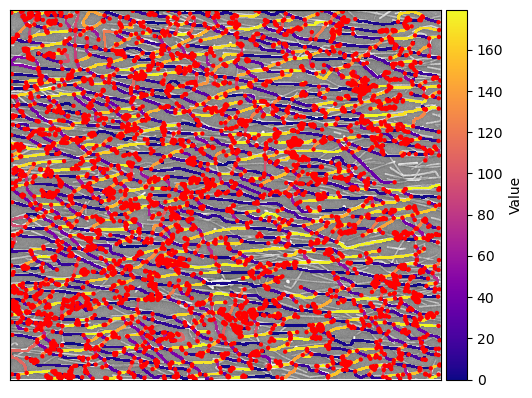

In [3]:
Nanowires.edge_plot(parameter=Q.angles)